<p> In this section, we will develop several models that will predict the price of the car using the variables or features.
<p> This is just an estimate but should give us an objective idea of how much the car should cost.

<p> Some questions we want to ask in this module
<p> do I know if the dealer is offering fair value for my trade-in?
<p> do I know if I put a fair value on my car?

### Setup

<p> Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### 1. Linear Regression and Multiple Linear Regression

#### Linear Regression
<p> One example of a Data Model that we will be using is

##### Simple Linear Regression.
<p> Simple Linear Regression is a method to help us understand the relationship between two variables:

<p> * The predictor/independent variable (X)
<p> * The response/dependent variable (that we want to predict)(Y)
    
<p> The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

Y:Response VariableX:Predictor Variables

##### Linear function:
Yhat=a+bX
 
<p> *  a refers to the intercept of the regression line0, in other words: the value of Y when X is 0
<p> *  b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

##### Lets load the modules for linear regression

In [3]:
from sklearn.linear_model import LinearRegression

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [5]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### How could Highway-mpg help us predict car price?

<p> For this example, we want to look at how highway-mpg can help us predict car price.
<p> Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [6]:
X = df[['highway-mpg']]
Y = df['price']

##### Fit the linear model using highway-mpg.

In [7]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### We can output a prediction

In [8]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

##### What is the value of the intercept (a)?

In [11]:
lm.intercept_

38423.3058581574

##### What is the value of the Slope (b)?

In [12]:
lm.coef_

array([-821.73337832])

#### What is the final estimated linear model we get?
<p> As we saw above, we should get a final linear model with the structure:
    <p> Yhat=a+bX
    <p> Plugging in the actual values we get:
        <p> price = 38423.31 - 821.73 x highway-mpg

##### Create a linear regression object?

In [13]:
lm = LinearRegression()

##### Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable?

In [14]:
lm.fit(df[['engine-size']],Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Find the slope and intercept of the model?

###### Slop

In [15]:
lm.coef_

array([166.86001569])

###### intercept 

In [16]:
lm.intercept_

-7963.338906281024

##### What is the equation of the predicted line. You can use x and yhat or 'engine-size' or 'price'?

<p> price = -7963.34 + 166.86 x engine-size

### Multiple Linear Regression

<p> What if we want to predict car price using more than one variable?
<p> If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression.
<p> Multiple Linear Regression is very similar to Simple Linear Regression,
<p> but this method is used to explain the relationship between one continuous
<p> response (dependent) variable and two or more predictor (independent) variables.
<p> Most of the real-world regression models involve multiple predictors.
<p> We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:
<p> Y:Response Variable
<p> X1:Predictor Variable 1
<p> X2:Predictor Variable 2
<p> X3:Predictor Variable 3
<p> X4:Predictor Variable 4

<p> a:intercept
<p> b1:coefficients of Variable 1
<p> b2:coefficients of Variable 2
<p> b3:coefficients of Variable 3
<p> b4:coefficients of Variable 4

  <p> The equation is given by:
  <p>  Yhat=a+b1X1+b2X2+b3X3+b4X4
<p> From the previous section we know that other good predictors of price could be:

<p> Horsepower
<p> Curb-weight
<p> Engine-size
<p> Highway-mpg
<p> Lets develop a model using these variables as the predictor variables.

In [17]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

##### Fit the linear model using the four above-mentioned variables.

In [18]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### What is the value of the intercept(a)?

In [19]:
lm.intercept_

-15806.62462632923

##### What are the values of the coefficients (b1, b2, b3, b4)?

In [20]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

#### What is the final estimated linear model that we get?
<p> As we saw above, we should get a final linear function with the structure:
<p> Yhat=a+b1X1+b2X2+b3X3+b4X4
<p> What is the linear function we get in this example?
<p> Price = -15678.74 + 52.66 x horsepower + 4.699 x curb-weight + 81.96 x engine-size + 33.58 x highway-mpg

##### Create and train a Multiple Linear Regression model "lm2" where the response variable is price, and the predictor variable is 'normalized-losses' and 'highway-mpg'.

In [21]:
lm2= LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']],df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Find the coefficient of the model?

In [22]:
lm2.coef_

array([   1.49789586, -820.45434016])

##### What is the value of the intercept(a)?

In [23]:
lm2.intercept_

38201.31327245727

### 2. Model Evaluation using Visualization

<p> Now that we've developed some models, how do we evaluate our models and how do we choose the best one?
<p> One way to do this is by using visualization.

##### import the visualization package: seaborn

In [24]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

#### Regression Plot

<p> When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

<p> This plot will show a combination of a scattered data points (a scatter plot), as well as the fitted linear regression line going through the data.
<p> This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation,
<p> as well as the direction (positive or negative correlation).

##### Let's visualize Horsepower as potential predictor variable of price:

(0.0, 48179.56393904277)

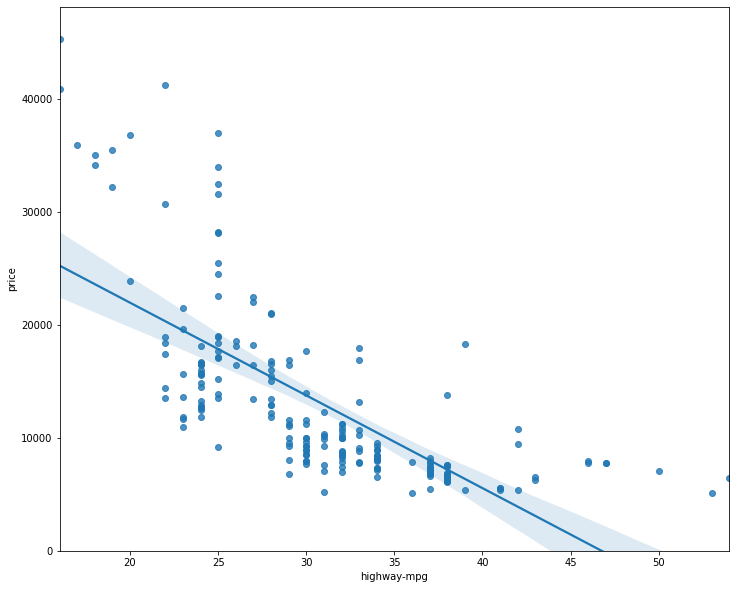

In [25]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p> We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative.
<p> One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line.
<p> This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not.
<p> If the data is too far off from the line, this linear model might not be the best model for this data.
<p> Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

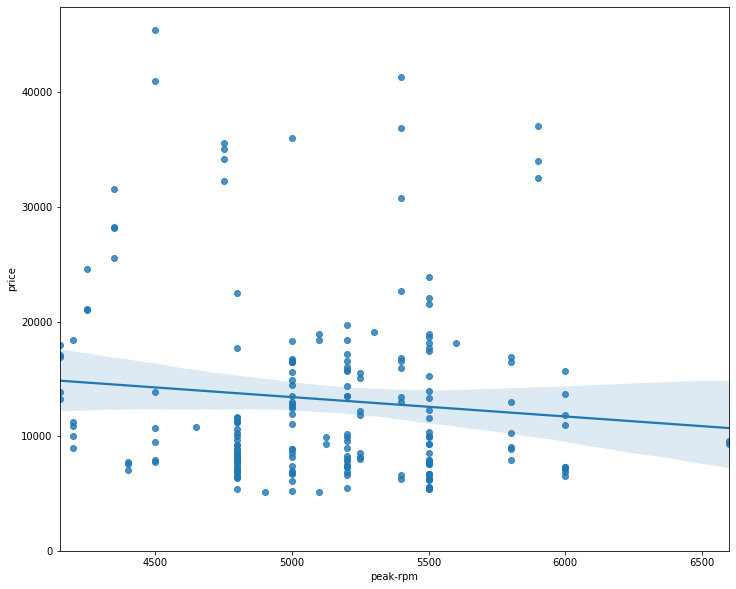

In [26]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p> Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease.
<p> The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.

##### Given the regression plots above is "peak-rpm" or "highway-mpg" more strongly correlated with "price". Use the method ".corr()" to verify your answer.

In [27]:
df[["highway-mpg","price"]].corr(method ='pearson')

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


In [28]:
print(df[["peak-rpm","price"]].corr(method ='pearson'))

          peak-rpm     price
peak-rpm  1.000000 -0.101616
price    -0.101616  1.000000


#### Residual Plot

<p> A good way to visualize the variance of the data is to use a residual plot.
<p> What is a residual?
<p> The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). 
<p> When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

<p> So what is a residual plot?
<p> A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.
<p> What do we pay attention to when looking at a residual plot?
<p> We look at the spread of the residuals:
<p> If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.
<p> Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


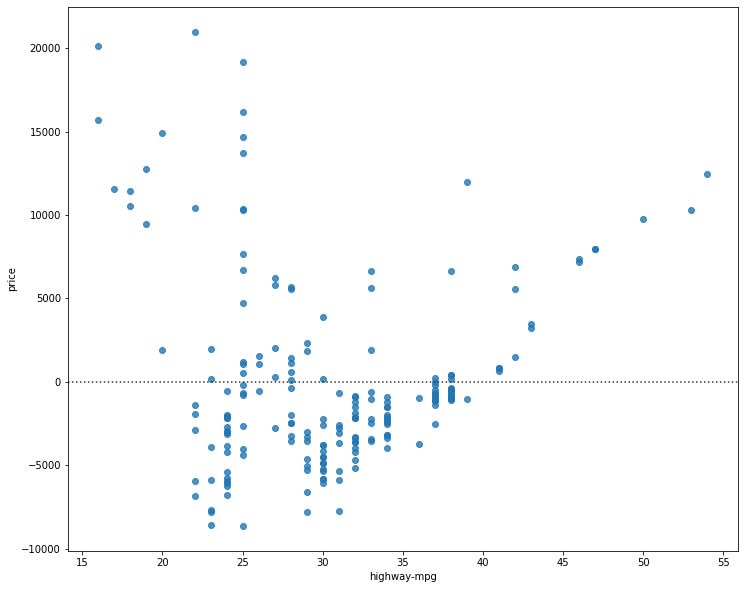

In [29]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

<p> What is this plot telling us?
<p> We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

#### Multiple Linear Regression
<p> How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.
<p> One way to look at the fit of the model is by looking at the distribution plot:
<p> We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

<p> First lets make a prediction

In [30]:
Y_hat = lm.predict(Z)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


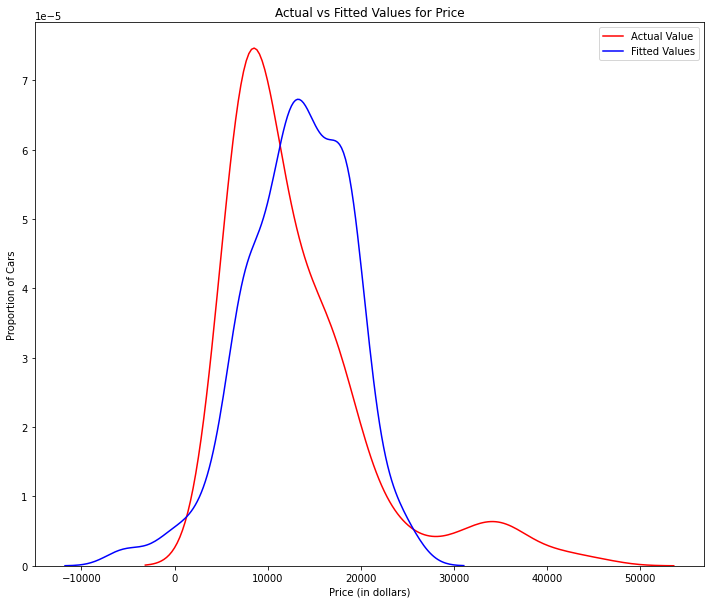

In [31]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show()
plt.close()

<p> We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit.
<p> However, there is definitely some room for improvement.

### 3. Polynomial Regression and Pipelines

<p> Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

<p> We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

<p> There are different orders of polynomial regression:
    
<p> Quadratic - 2nd order 
<p> Yhat =a + b1X^2 + b2X^2
 
<p> Cubic - 3rd order
<p> Yhat = a + b1X^2 + b2X^2+ b3X^3

<p> Higher order:
<p> Y = a + b1X^2 + b2X^2 + b3X^3....

<p> We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable.
<p> Let's see if we can try fitting a polynomial model to the data instead.

<p> We will use the following function to plot the data:

In [32]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

##### lets get the variables

In [33]:
x = df['highway-mpg']
y = df['price']

##### Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

In [34]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
p

poly1d([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

##### Let's plot the function

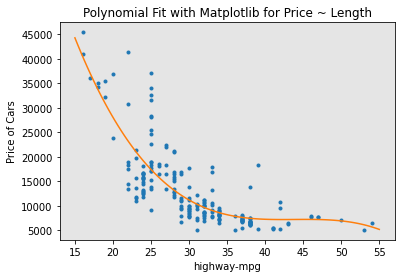

In [35]:
PlotPolly(p, x, y, 'highway-mpg')

In [36]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p> We can already see from plotting that this polynomial model performs better than the linear model.
<p> This is because the generated polynomial function "hits" more of the data points.

##### Create 11 order polynomial model with the variables x and y from above?

In [37]:
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
p

poly1d([-1.24263391e-08,  4.72184893e-06, -8.02843483e-04,  8.05640305e-02,
       -5.29740982e+00,  2.39470329e+02, -7.58845741e+03,  1.68447254e+05,
       -2.56531153e+06,  2.55140622e+07, -1.49106965e+08,  3.87930088e+08])

<p> The analytical expression for Multivariate Polynomial function gets complicated.
<p> For example, the expression for a second-order (degree=2)polynomial with two variables is given by:
<p> Yhat=a+b1X1+b2X2+b3X1X2+b4X1^2+b5X2^2

<p> We can perform a polynomial transform on multiple features. First, we import the module:

In [38]:
from sklearn.preprocessing import PolynomialFeatures

<p> We create a PolynomialFeatures object of degree 2:

In [39]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [40]:
Z_pr=pr.fit_transform(Z)

<p> The original data is of 201 samples and 4 features:

In [41]:
Z.shape

(201, 4)

<p> after the transformation, there 201 samples and 15 features:

In [42]:
Z_pr.shape

(201, 15)

#### Pipeline

<p> Data Pipelines simplify the steps of processing the data.
<p> We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

<p> We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [44]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

<p> we input the list as an argument to the pipeline constructor

In [45]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

<p> We can normalize the data, perform a transform and fit the model simultaneously.

In [46]:
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

<p> Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously

In [47]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

##### Create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y

In [48]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015])

### 4. Measures for In-Sample Evaluation

<p> When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.
<p> Two very important measures that are often used in Statistics to determine the accuracy of a model are:
<p> R^2 / R-squared
<p> Mean Squared Error (MSE)
    
<pp> R-squared :
<p> R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.
<p> The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.
    
<pp> Mean Squared Error (MSE) :
<p> The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

#### Model 1: Simple Linear Regression

<p> Let's calculate the R^2

In [49]:
# highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


<p> We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit"

<p> Let's calculate the MSE
<p> We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [50]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


##### lets import the function mean_squared_error from the module metrics

In [51]:
from sklearn.metrics import mean_squared_error

<p> we compare the predicted results with the actual results

In [52]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


#### Model 2: Multiple Linear Regression

<p> Let's calculate the R^2

In [53]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


<p> We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

#### Let's calculate the MSE

<p> we produce a prediction

In [54]:
Y_predict_multifit = lm.predict(Z)

In [55]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


#### Model 3: Polynomial Fit

<p> Let's calculate the R^2

<p> let’s import the function r2_score from the module metrics as we are using a different function

In [56]:
from sklearn.metrics import r2_score

<p> We apply the function to get the value of r^2

In [57]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.7023769091604768


<p> We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

#### MSE

<p> We can also calculate the MSE:

In [58]:
mean_squared_error(df['price'], p(x))

18703127.644377414

#### 5. Prediction and Decision Making

##### Prediction
<P> In the previous section, we trained the model using the method fit.
<P> Now we will use the method predict to produce a prediction.
<P> Lets import pyplot for plotting; we will also be using some functions from numpy.

In [59]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

<P> Create a new input

In [60]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

<P> Fit the model

In [61]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<P> Produce a prediction

In [62]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

<P> we can plot the data

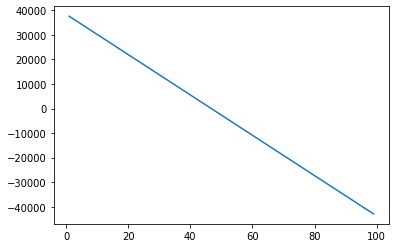

In [63]:
plt.plot(new_input, yhat)
plt.show()

##### Decision Making: Determining a Good Model Fit

<P> Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

<P> What is a good R-squared value?
<P> When comparing models, the model with the higher R-squared value is a better fit for the data.

<P> What is a good MSE?
<P> When comparing models, the model with the smallest MSE value is a better fit for the data.

##### Let's take a look at the values for the different models.

###### Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price:

<P> R-squared: 0.49659118843391759
<P> MSE: 3.16 x10^7
    
<P> Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price:

<P> R-squared: 0.80896354913783497
<P> MSE: 1.2 x10^7
    
<P> Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price:

<P> R-squared: 0.6741946663906514
<P> MSE: 2.05 x 10^7
    

###### Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)
<P> Usually, the more variables you have, the better your model is at predicting, but this is not always true.
<P> Sometimes you may not have enough data, you may run into numerical problems,
<P> or many of the variables may not be useful and or even act as noise.
<P> As a result, you should always check the MSE and R^2.
<P> So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

<P> MSE The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
<P> R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR.
<P> The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
<P> This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

###### Simple Linear Model (SLR) vs Polynomial Fit
<P> MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
<P> R-squared: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
<P> Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

###### Multiple Linear Regression (MLR) vs Polynomial Fit
<P> Comparing these three models, we conclude that the MLR model is the best model to be able to predict price
<P> from our dataset. This result makes sense, since we have 27 variables in total,
<P> and we know that more than one of those variables are potential predictors of the final car price.

##### Final Results
<p> SLR : R-suare 0.49 , MSE 31,635,042
<p> MLR : R-suare 0.81 , MSE 11,980,366
<p> Polynomial : R-suare 0.70 , MSE 18,703,127

###### ========
#### Thank you